<a href="https://colab.research.google.com/github/kierangio/Colab-Files/blob/main/Data_Visualization_and_Random_Forrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import seaborn as sns

In [ ]:
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download uciml/breast-cancer-wisconsin-data

In [ ]:
# Unzip dataset file and store in Google Drive

# import zipfile
# with zipfile.ZipFile('/content/breast-cancer-wisconsin-data.zip', 'r') as zip_ref:
#   zip_ref.extractall('/content/drive/MyDrive/Understanding Misclassifications SURF/Breast_Cancer_Dataset')

In [ ]:
breast_cancer_data = pd.read_csv('/content/drive/MyDrive/Understanding Misclassifications SURF/Breast_Cancer_Dataset/data.csv')
bcd = pd.get_dummies(breast_cancer_data, columns=['diagnosis'])
bcd.drop(columns='Unnamed: 32', inplace=True)
bcd.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


Number of Benign:  357
Number of Malignant :  212


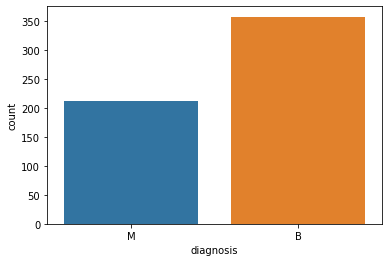

In [ ]:
#plotting bar graphs showing relative frequecny of Benign and Malignant tissue
y_plt = breast_cancer_data.diagnosis
x_plt = bcd.drop(['id','diagnosis_B', 'diagnosis_M'], axis=1)

ax = sns.countplot(x=y_plt,label="Count")
B, M = y_plt.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

---
This is a simple bar plot indicating the relative frequencies of benign and malignant tumours in the sample.

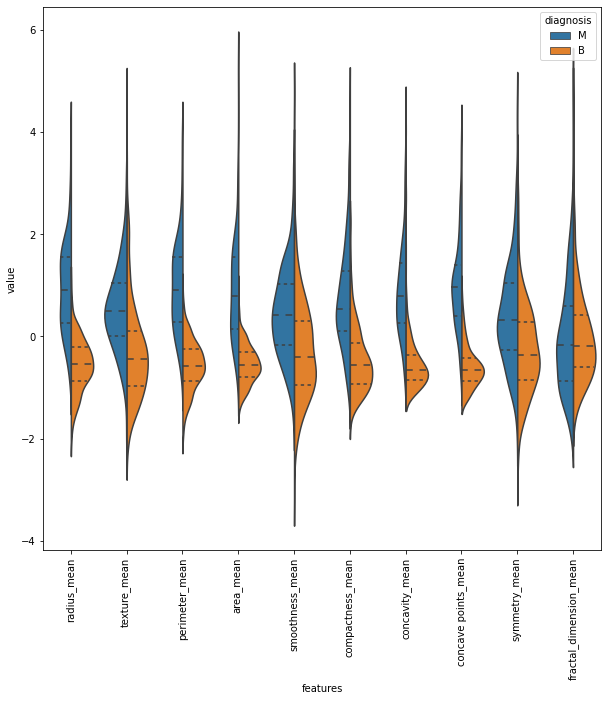

In [ ]:
# violin plot
data_dia = y_plt
data = x_plt
data_n_2 = (data - data.mean()) / (data.std())         # standardization

data = pd.concat([y_plt,data_n_2.iloc[:,0:10]],axis=1) # 0:10 means only first
                                                       # 10 features are shown
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True,
               inner="quart")
plt.xticks(rotation=90)
plt.show()

---
The violin plot above show that the medians of the Malignant and Benign diagnoses are very separated for certain features, such as the `concave_points_mean`. This would suggest that that feature would be good for classification. However, in `fractal_dimension_mean` feature, medians of the Malignant and Benign are not very separated so feature does not give good information for classification.

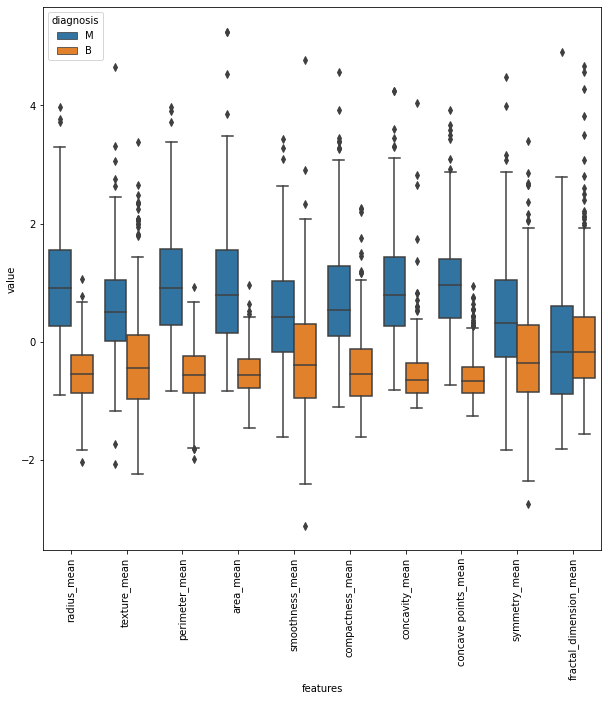

In [ ]:
# box plot



plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.show()

--- 
The box plot above offers offers an alternaitve way of viewing data in set. In particular, it is useful for identifying any outliers in the data. In this case the plot is also useful for identifying possible correlated variables.

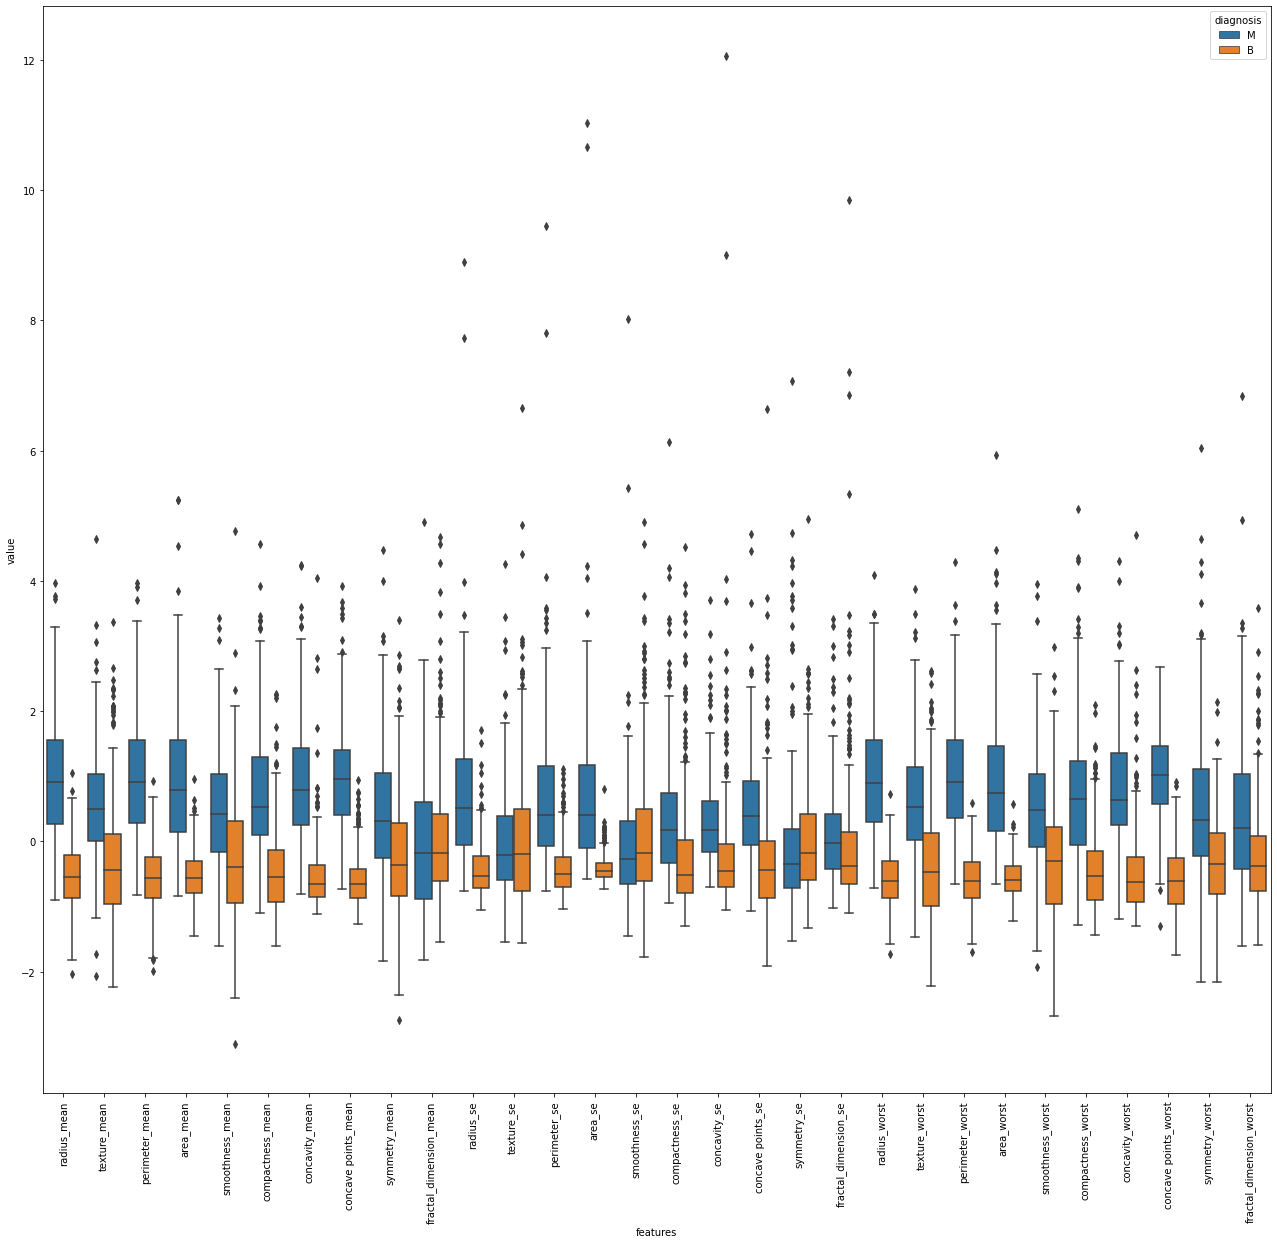

In [ ]:
# plotting with all features
full_data = pd.concat([y_plt,data_n_2.iloc[:,:]],axis=1) # 0:10 means only first
                                                       # 10 features are shown
full_data = pd.melt(full_data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
# plotting for all features
plt.figure(figsize=(22,20))
sns.boxplot(x="features", y="value", hue="diagnosis", data=full_data)
plt.xticks(rotation=90)
plt.show()

---
Looking at the two box plots above, we may be interested in finding out which variables are correlated. If we look closely, we can notice that `concavity_mean` and `radius_worst` appear to be correlated. How can we check if this is truly the case? One way of doing so, is by using a jointplot. The jointplot below, gives a visual idea of how correlated two features are in our dataset. The associated pearson coefficient quantifies this correlation for us; the closer to one, the more correlated.

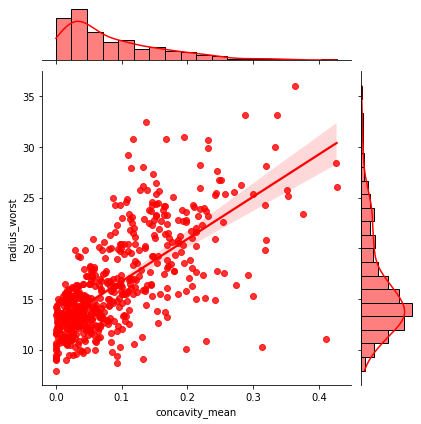

pearson coefficient of correlation is 0.6882364076436729


In [ ]:
x_simple = np.array(x_plt.loc[:, 'concavity_mean'])
y_simple = np.array(x_plt.loc[:, 'radius_worst'])
rho = np.corrcoef(x_simple, y_simple)
sns.jointplot(x=x_plt.loc[:,'concavity_mean'], y=x_plt.loc[:,'radius_worst'], kind="reg",color=(1,0,0))
plt.show()
print(f'pearson coefficient of correlation is {rho[0, 1]}')

A pearson coefficient of 0.68, implies that there is a moderate, to strong correlation. Now, what if we wanted to observe the correlation of all features pairwise? In such a case a heat map may be useful.

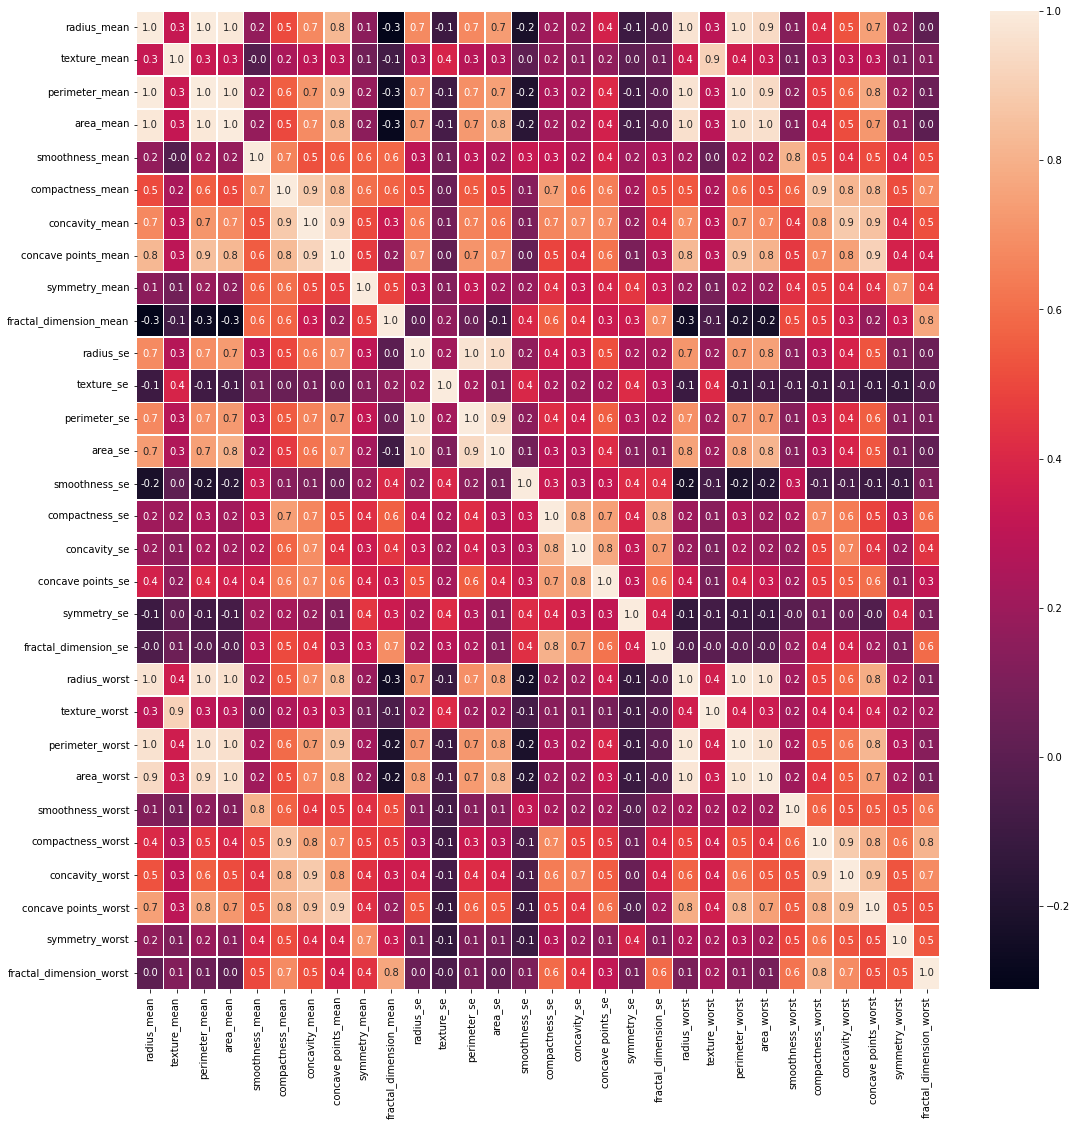

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x_plt.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

---
The above plot may look confusing but it is not difficult to interpret. The plot is essentially an $n \times n$ matrix (or grid, if you like) featuring $n \times n$ squares, where $n$ denotes the number of features in our dataset. Each square in the matrix gives the correlation between two features. A square in the $i$-th row, $j$-th column will therfore show the correlation coefficient corresponding to the features in $i$-th row, and $j$-th column ($i$-th and $j$-th features in our dataset). Notice that the matrix is symmetric, this is because the correlation of of $X$ and $Y$ is identical to the correlation of $Y$ and $X$.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


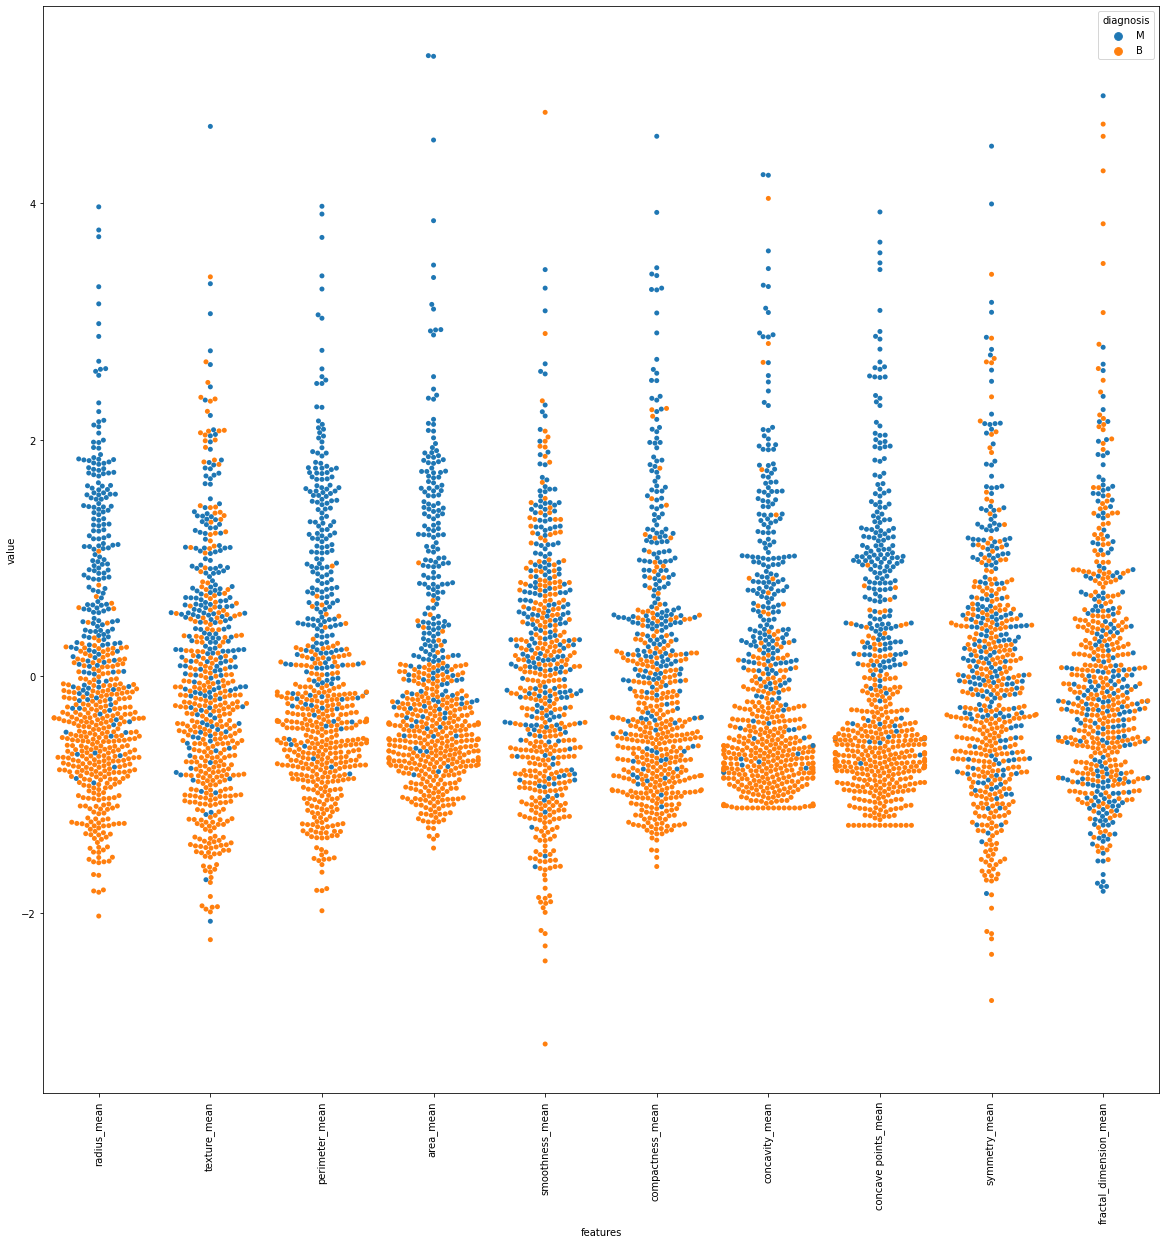

In [ ]:
# sawrm plot
plt.figure(figsize=(20,20))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
sns.swarmplot()
sns.swarmplot()
sns.swarmplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# setting variables
y = bcd['diagnosis_B']
x = bcd.drop(['id','diagnosis_B', 'diagnosis_M'], axis=1) # X is chosen to have
                                                        # all possible features

# Initializing test-train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Instantiate regression objects
lin_regr = linear_model.LinearRegression()
dec_tree_regr = DecisionTreeRegressor(max_depth=8)

# Training the models using the train data
lin_regr.fit(x_train, y_train)
dec_tree_regr.fit(x_train, y_train)
# Use the model to predict the test data
y_pred_lin = lin_regr.predict(x_test)
y_pred_dt = dec_tree_regr.predict(x_test)
# Form residual
resid_lin = y_test - y_pred_lin
resid_dt = y_test - y_pred_dt

In [ ]:
# using scikit-learn to compute r2 (r2_score was imported above)
r2_lin = r2_score(y_test, y_pred)
print('Rsquared is: ', str(r2), "\n")

# compute other error measures
RMSE = np.sqrt(np.mean(resid ** 2))
print('Root Mean Square Error is: ', str(RMSE), "\n")

MAE = np.mean(np.abs(resid))
print('Mean Absolute Error is: ', str(MAE), "\n")

CV = 100 * RMSE/np.mean(y_test)
print('Coefficient of Variation is: ', str(round(CV)), "%\n")

In [ ]:
# plot histograms of test data and predicted data  

fig = plt.figure(figsize=(6,6))
ax = plt.subplot()
ax.hist(y_test, bins=50, color = (0.56,0.18,1), alpha = 0.7 , ec = 'k',
         label = 'test data')
ax.hist(y_pred, bins=50, color = (1,0.1,0.4), alpha = 0.7 , ec = 'k',
         label = 'predicted data')

plt.annotate('M', (0, 0), textcoords="offset points",
             xytext=(0, -30), ha='center')
plt.annotate('B', (1, 0), textcoords="offset points",
             xytext=(0, -30), ha='center')
ax.legend()
plt.show()

In [ ]:
pd.Seri